In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.image import resize
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Visualizing Audio

In [3]:
# Load the dataset
music_df = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')
music_df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [4]:
music_df['label'].value_counts()

label
blues        1000
jazz         1000
pop          1000
reggae       1000
metal        1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

In [5]:
music_df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var                  float64
mfcc7_mean                 float64
mfcc7_var                  float64
mfcc8_mean                 float64
mfcc8_var                  float64
mfcc9_mean                 float64
mfcc9_var                  float64
mfcc10_mean                float64
mfcc10_var                 float64
mfcc11_mean                float64
mfcc11_var                 float64
mfcc12_mean                float64
mfcc12_var                 float64
mfcc13_mean                float64
mfcc13_var                 float64
mfcc14_mean                float64
mfcc14_var                 float64
mfcc15_mean                float64
mfcc15_var                 float64
mfcc16_mean                float64
mfcc16_var                 float64
mfcc17_mean                float64
mfcc17_var                 float64
mfcc18_mean                float64
mfcc18_var                 float64
mfcc19_mean                float64
mfcc19_var                 float64
mfcc20_mean                float64
mfcc20_var                 float64
label                       object
dtype: object

In [6]:
random_file_name = "/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav"

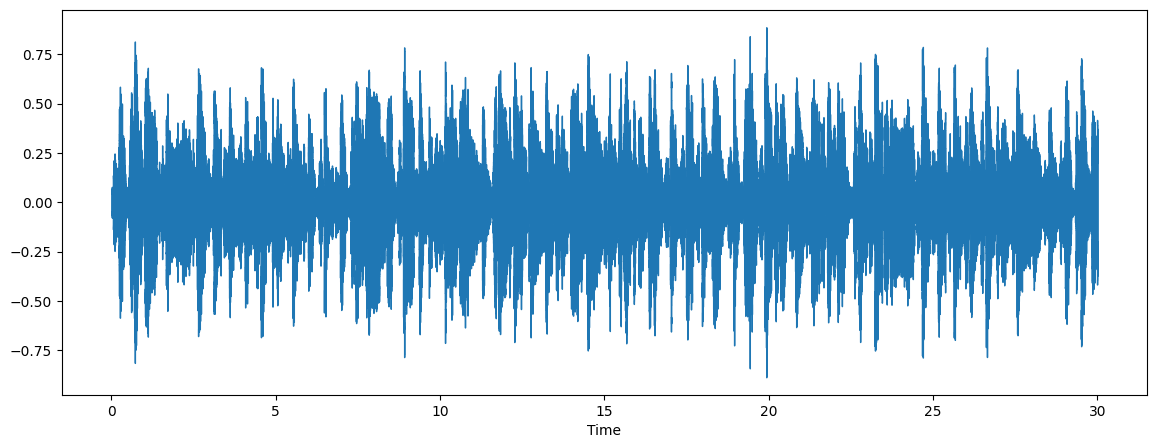

In [7]:
x, sr = librosa.load(random_file_name, sr = 44100)
plt.figure(figsize = (14, 5))
librosa.display.waveshow(x, sr = sr)

In [8]:
# 1. BLUES
!ls /content/drive/MyDrive/Data/genres_original/blues/ # Use this to list the files and check if the file exists
audio_blues = "/content/drive/MyDrive/Data/genres_original/blues/blues.00015.wav"
from IPython.display import Audio
Audio(audio_blues, rate=sr)

blues.00000.wav  blues.00020.wav  blues.00040.wav  blues.00060.wav  blues.00080.wav
blues.00001.wav  blues.00021.wav  blues.00041.wav  blues.00061.wav  blues.00081.wav
blues.00002.wav  blues.00022.wav  blues.00042.wav  blues.00062.wav  blues.00082.wav
blues.00003.wav  blues.00023.wav  blues.00043.wav  blues.00063.wav  blues.00083.wav
blues.00004.wav  blues.00024.wav  blues.00044.wav  blues.00064.wav  blues.00084.wav
blues.00005.wav  blues.00025.wav  blues.00045.wav  blues.00065.wav  blues.00085.wav
blues.00006.wav  blues.00026.wav  blues.00046.wav  blues.00066.wav  blues.00086.wav
blues.00007.wav  blues.00027.wav  blues.00047.wav  blues.00067.wav  blues.00087.wav
blues.00008.wav  blues.00028.wav  blues.00048.wav  blues.00068.wav  blues.00088.wav
blues.00009.wav  blues.00029.wav  blues.00049.wav  blues.00069.wav  blues.00089.wav
blues.00010.wav  blues.00030.wav  blues.00050.wav  blues.00070.wav  blues.00090.wav
blues.00011.wav  blues.00031.wav  blues.00051.wav  blues.00071.wav  blues.00

In [9]:
music_df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

In [10]:
# Finding missing values
music_df.isnull().any()   # music_df.isnull().sum()

filename                   False
length                     False
chroma_stft_mean           False
chroma_stft_var            False
rms_mean                   False
rms_var                    False
spectral_centroid_mean     False
spectral_centroid_var      False
spectral_bandwidth_mean    False
spectral_bandwidth_var     False
rolloff_mean               False
rolloff_var                False
zero_crossing_rate_mean    False
zero_crossing_rate_var     False
harmony_mean               False
harmony_var                False
perceptr_mean              False
perceptr_var               False
tempo                      False
mfcc1_mean                 False
mfcc1_var                  False
mfcc2_mean                 False
mfcc2_var                  False
mfcc3_mean                 False
mfcc3_var                  False
mfcc4_mean                 False
mfcc4_var                  False
mfcc5_mean                 False
mfcc5_var                  False
mfcc6_mean                 False
mfcc6_var                  False
mfcc7_mean                 False
mfcc7_var                  False
mfcc8_mean                 False
mfcc8_var                  False
mfcc9_mean                 False
mfcc9_var                  False
mfcc10_mean                False
mfcc10_var                 False
mfcc11_mean                False
mfcc11_var                 False
mfcc12_mean                False
mfcc12_var                 False
mfcc13_mean                False
mfcc13_var                 False
mfcc14_mean                False
mfcc14_var                 False
mfcc15_mean                False
mfcc15_var                 False
mfcc16_mean                False
mfcc16_var                 False
mfcc17_mean                False
mfcc17_var                 False
mfcc18_mean                False
mfcc18_var                 False
mfcc19_mean                False
mfcc19_var                 False
mfcc20_mean                False
mfcc20_var                 False
label                      False
dtype: bool

In [11]:
music_df

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0     0.003521             1773.065032          167541.630869   
1     0.001450             1816.693777           90525.690866   
2     0.004620             1788.539719          111407.437613   
3     0.002448             1655.289045          111952.284517   
4     0.001701             1630.656199           79667.267654   
...        ...                     ...                    ...   
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0                 1972.744388           117335.771563  ...   39.687145   
1                 2010.051501            65671.875673  ...   64.748276   
2                 2084.565132            75124.921716  ...   67.336563   
3                 1960.039988            82913.639269  ...   47.739452   
4                 1948.503884            60204.020268  ...   30.336359   
...                       ...                     ...  ...         ...   
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       -3.241280   36.488243     0.722209   38.099152    -5.050335   
1       -6.055294   40.677654     0.159015   51.264091    -2.837699   
2       -1.768610   28.348579     2.378768   45.717648    -1.938424   
3       -3.841155   28.337118     1.218588   34.770935    -3.580352   
4        0.664582   45.880913     1.689446   51.363583    -3.392489   
...           ...         ...          ...         ...          ...   
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
0      33.618073    -0.243027   43.771767  blues  
1      97.030830     5.784063   59.943081  blues  
2      53.050835     2.517375   33.105122  blues  
3      50.836224     3.630866   32.023678  blues  
4      26.738789     0.536961   29.146694  blues  
...          ...          ...         ...    ...  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     

In [13]:
#Fourier Transform (FFT) -Frequency Domain
signal = x
fft = np.fft.fft(signal)

In [14]:
#Calculate the Magnitude (abs values on complex numbers)
spectrum =np.abs(fft)

In [16]:
#Create the frequency variable
sample_rate = sr
f =np.linspace(0, sample_rate , len(spectrum))

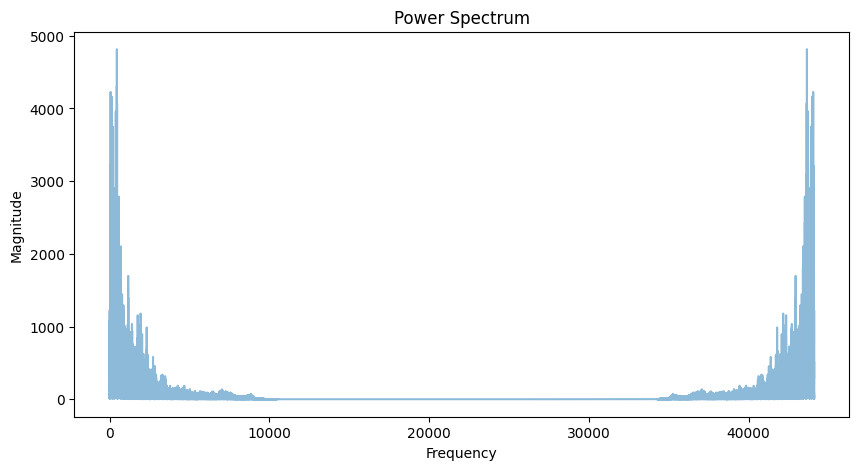

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define FIG_SIZE before using it
FIG_SIZE = (10, 5)  # Example size, adjust as needed

# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")
plt.show() # Add this to display the plot

In [18]:
#Take half of the spectrum and frequency
left_spectrum =spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

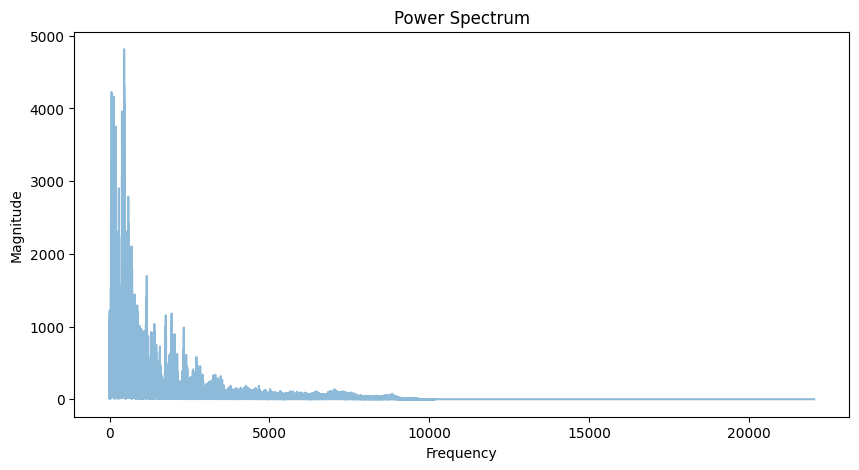

In [19]:
#Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f,left_spectrum,alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [20]:
#Spectrogram (STFT)
hop_length = 512 #no.of samples
n_fft = 2048 #no.of samples for window

In [21]:
#Perform STFT
stft = librosa.stft(signal,n_fft=n_fft,hop_length=hop_length)

In [22]:
#Calculate the Magnitude (abs values on complex numbers)
spectrogram= np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

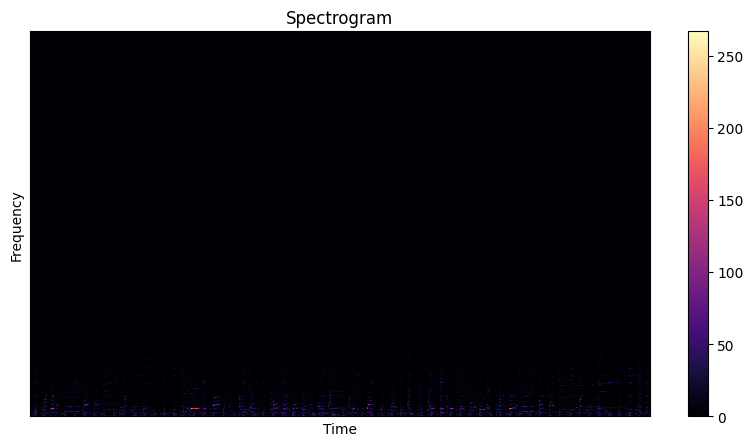

In [23]:
#Plot the spectogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram,sr=sample_rate,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [24]:
#Apply Logarthm to get values in Decimals
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

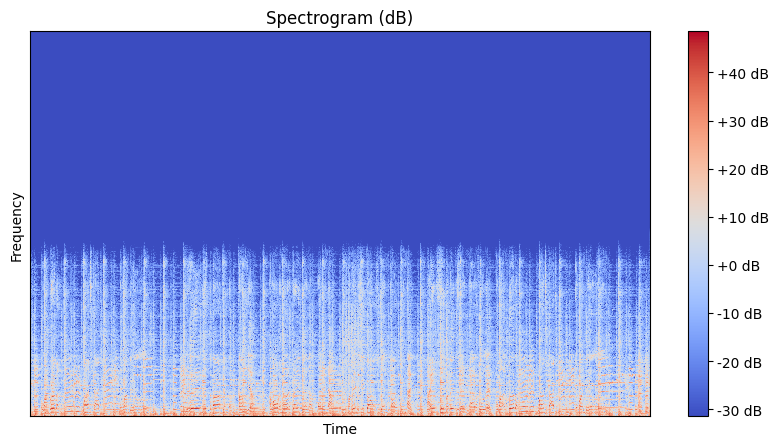

In [25]:
#Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format = "%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# Feature Extraction
from sklearn.preprocessing import LabelEncoder

class_list = music_df.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(music_df.iloc[:, :-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

# Doing Visualization on chunks of Audio

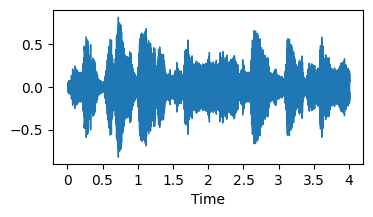

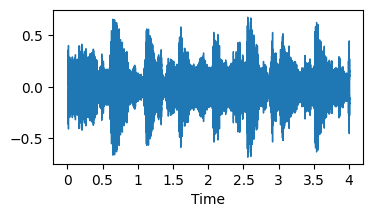

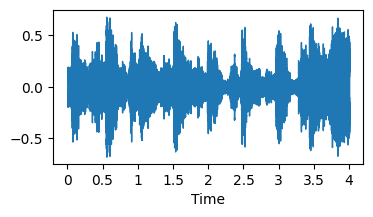

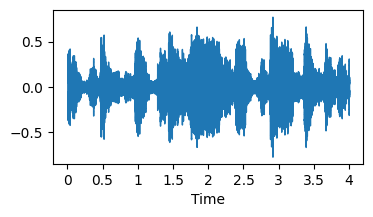

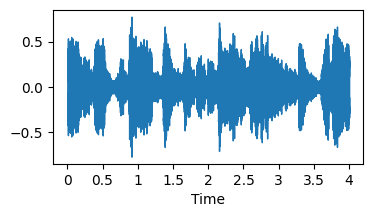

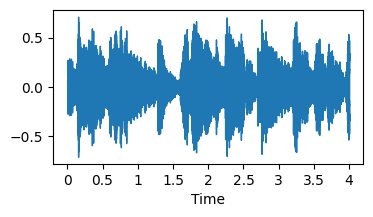

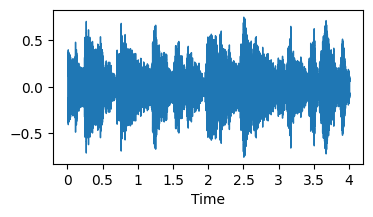

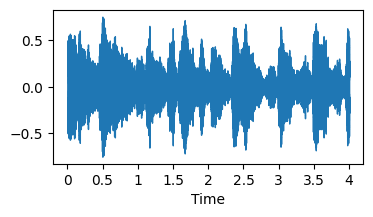

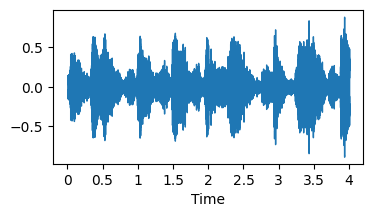

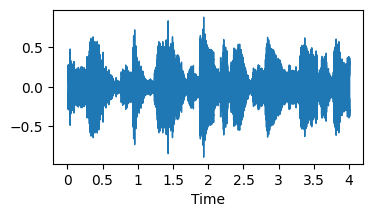

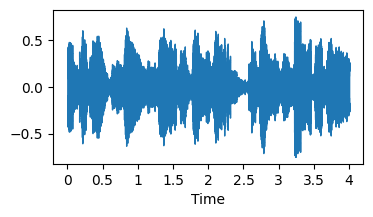

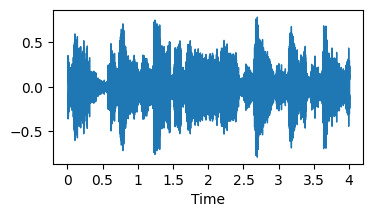

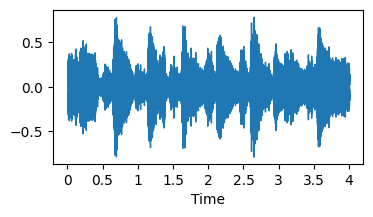

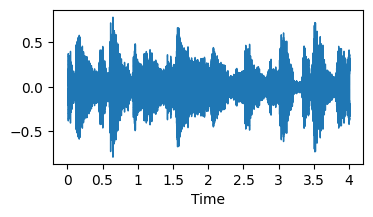

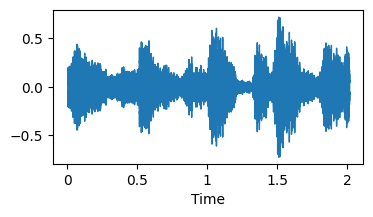

In [ ]:
audio_path = "/content/drive/MyDrive/Data/genres_original/blues/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)

#Defining the duration of each chunk and overlap
chunk_duration = 4 #sec
overlap_duration = 2 #sec

#Converting duration to samples
chunk_samples = int(chunk_duration * sr)
overlap_samples = int(overlap_duration * sr)

#Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Use num_chunks instead of num_Chunks
for i in range(num_chunks):
    start_sample = i * (chunk_samples - overlap_samples)
    end_sample = start_sample + chunk_samples

    #Extract the chunk
    chunk = y[start_sample:end_sample]
    plt.figure(figsize = (4, 2))
    librosa.display.waveshow(chunk, sr = sr)
    plt.show()

# Melspectogram Visualization

In [ ]:
#Plotting Melspectogram of Entire audio
def plot_melspectogram(y, sr):
  spectogram = librosa.feature.melspectrogram(y = y, sr = sr)
  spectogram_db = librosa.power_to_db(spectogram, ref = np.max)
  plt.figure(figsize = (10, 4))
  librosa.display.specshow(spectogram_db, sr = sr, x_axis = 'time', y_axis = 'mel')
  plt.colorbar(format = '%+2.0f dB')
  plt.title("Spectogram")
  plt.tight_layout()
  plt.show()

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def plot_melspectogram_chunk(y, sr):
  chunk_duration = 4 #sec
  overlap_duration = 2 #sec
  chunk_samples = int(chunk_duration * sr)
  overlap_samples = int(overlap_duration * sr)
  num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
  for i in range(num_chunks):
    start_sample = i * (chunk_samples - overlap_samples)
    end_sample = start_sample + chunk_samples
    chunk = y[start_sample:end_sample]

    #Computing the Mel spectrogram for the chunk
    mel_spectogram = librosa.feature.melspectrogram(y = chunk, sr = sr)
    print(mel_spectogram.shape)
    spectogram_db = librosa.power_to_db(mel_spectogram,ref=np.max)

    #Visualizing the Spectogram
    plt.figure(figsize = (10,4))
    librosa.display.specshow(spectogram_db, sr = sr, x_axis = 'time', y_axis = 'mel')
    plt.colorbar(format = '%+2.0f dB')
    plt.title("Spectogram")
    plt.tight_layout()
    plt.show()

(128, 173)


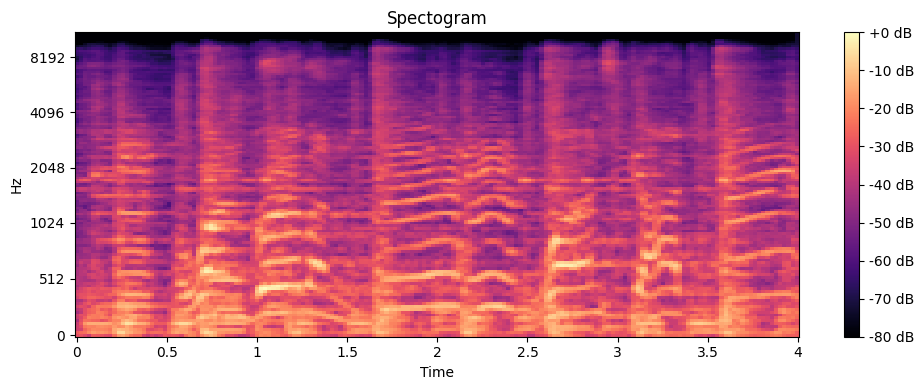

(128, 173)


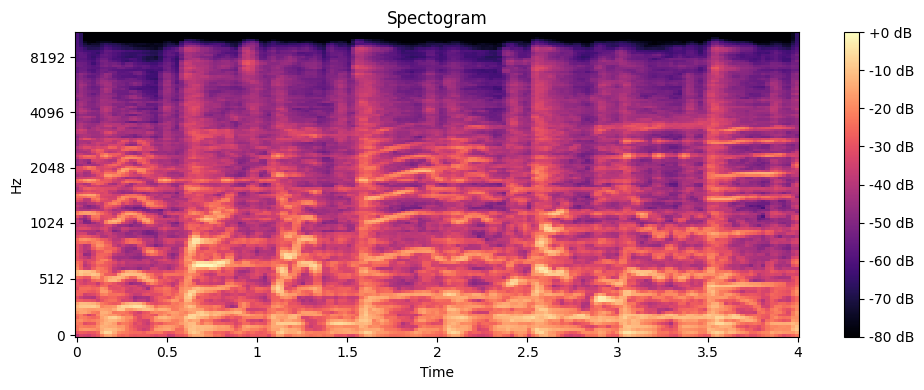

(128, 173)


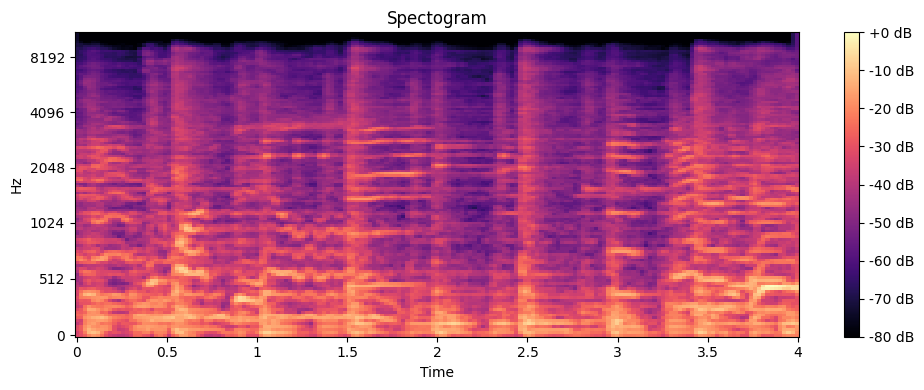

(128, 173)


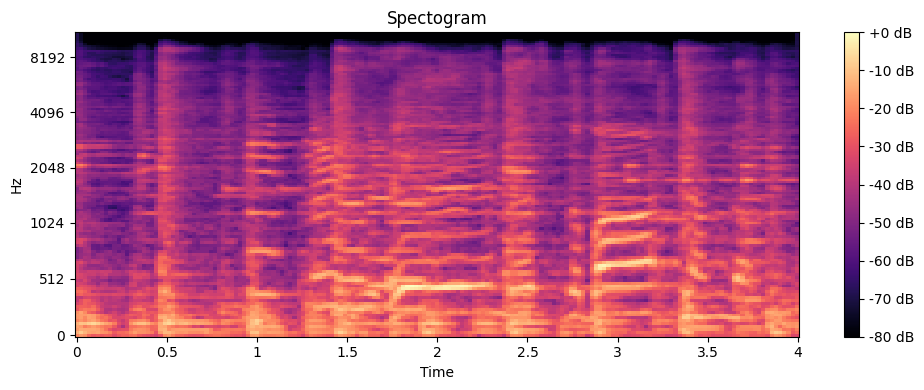

(128, 173)


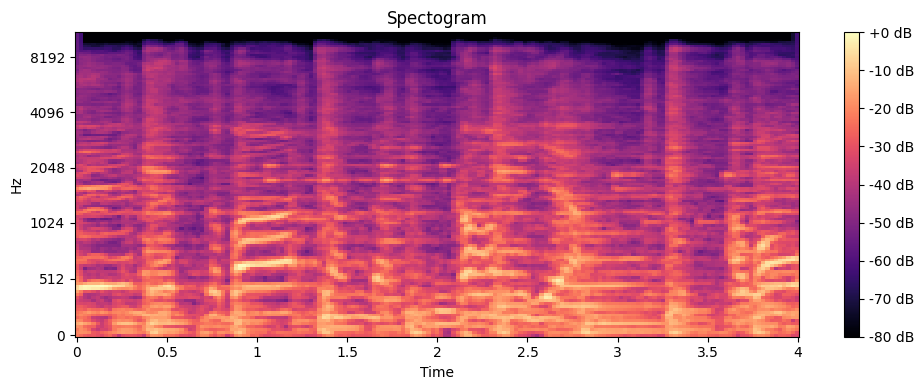

(128, 173)


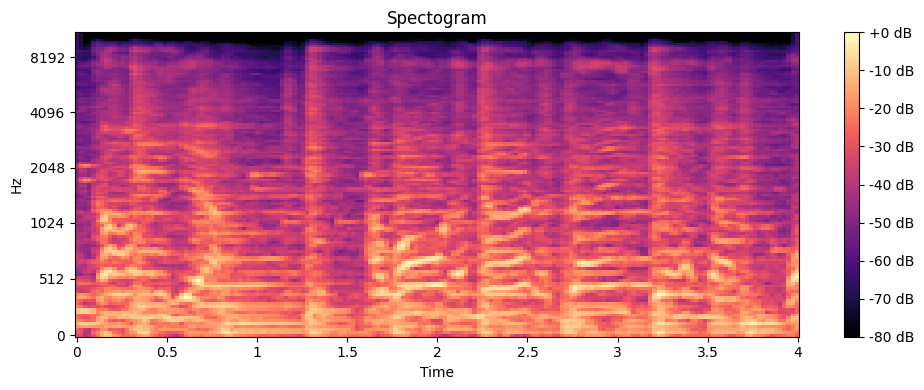

(128, 173)


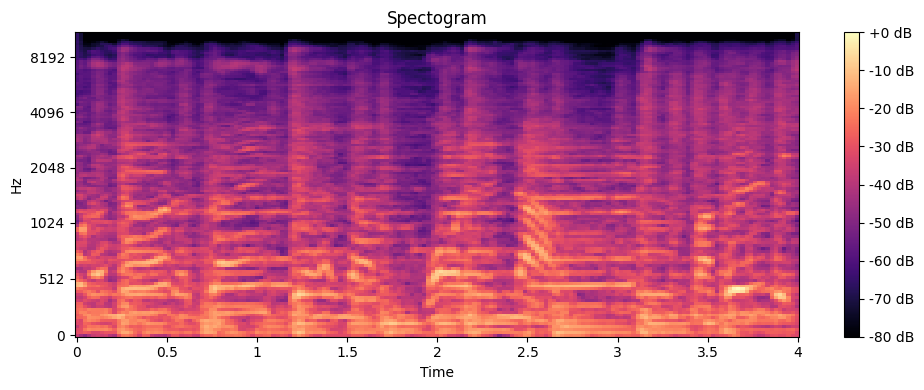

(128, 173)


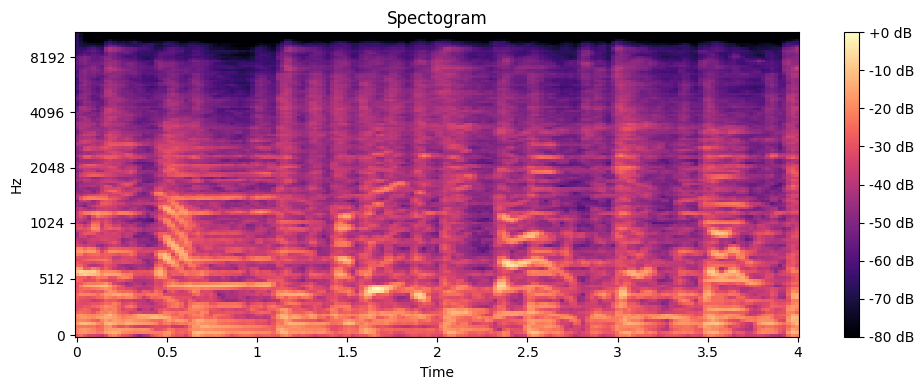

(128, 173)


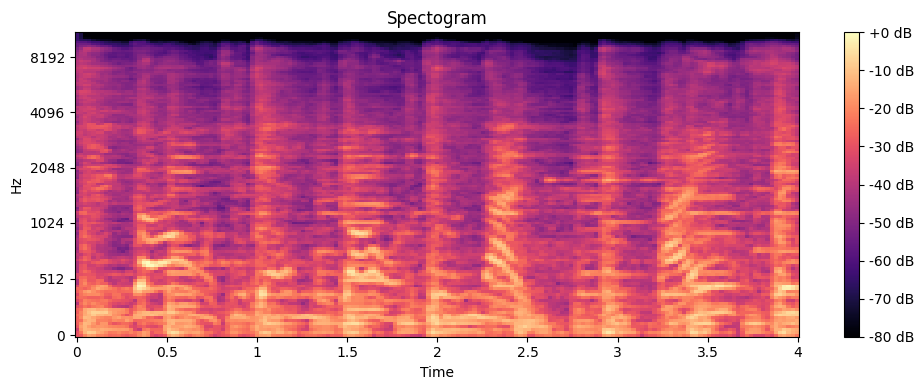

(128, 173)


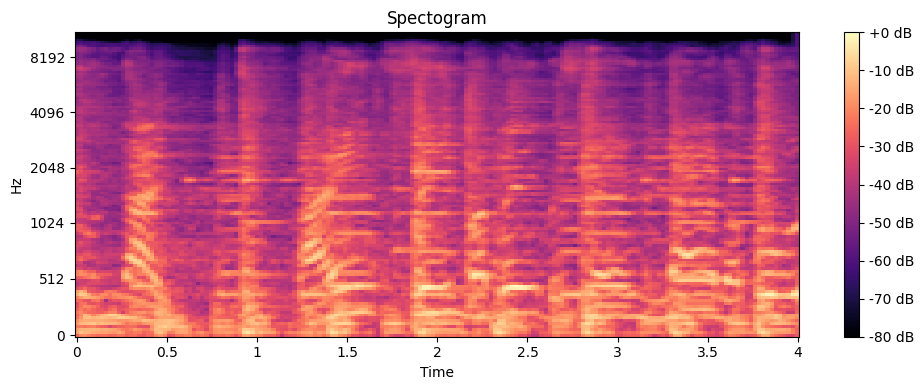

(128, 173)


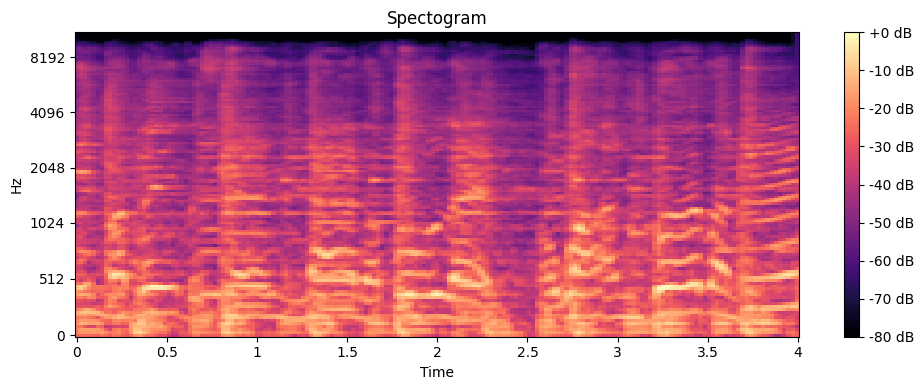

(128, 173)


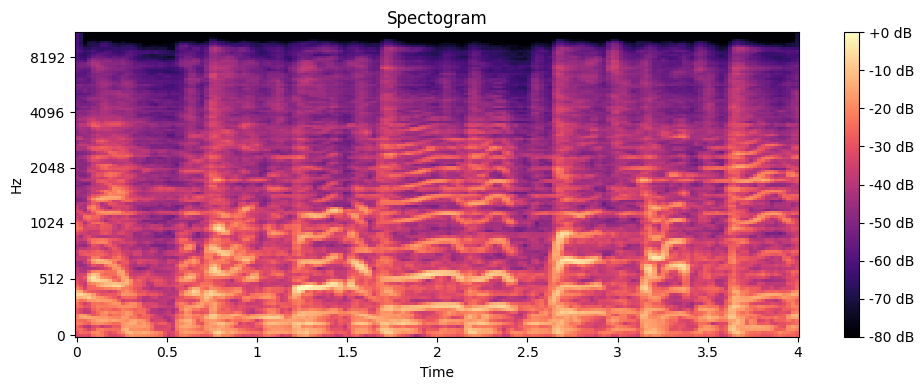

(128, 173)


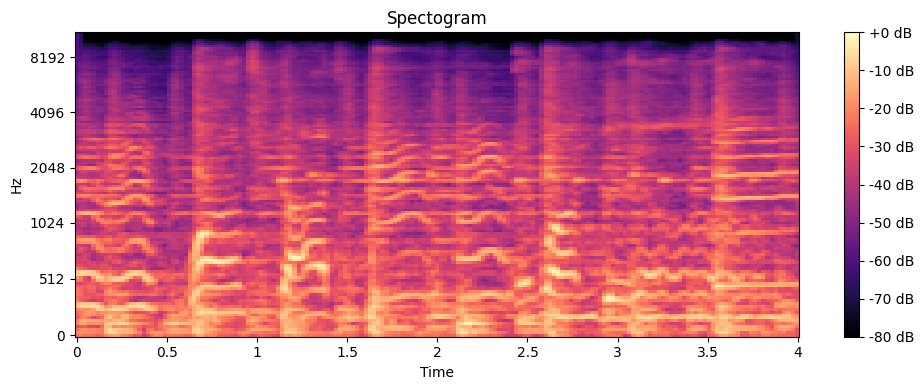

(128, 173)


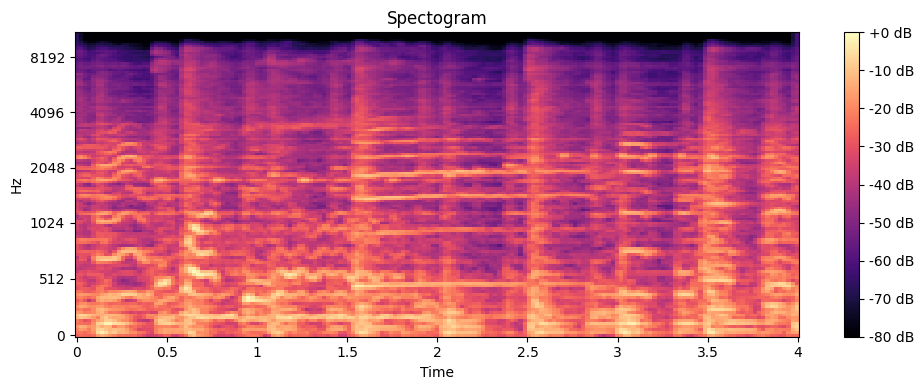

(128, 87)


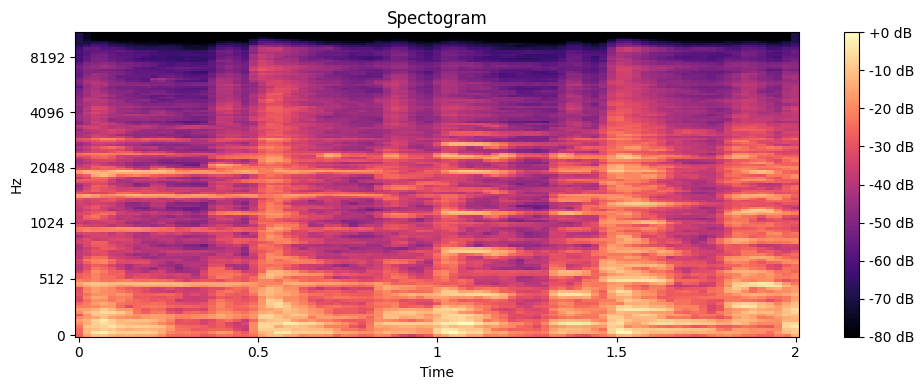

In [ ]:
#Spectogram Audio Chunks
plot_melspectogram_chunk(y = y,sr = sr )

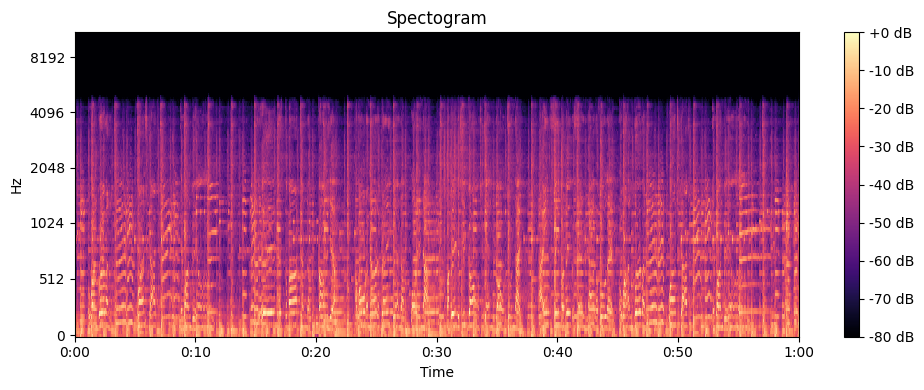

In [ ]:
#Spectogram for Entire Audio
plot_melspectogram(y = x, sr = sr)

In [ ]:
#Defining the Folder Structure
data_dir = "/content/drive/MyDrive/Data/genres_original"
genres = os.listdir(data_dir)
print(genres)

['disco', 'pop', 'hiphop', 'reggae', 'classical', 'blues', 'country', 'metal', 'jazz', 'rock']


In [ ]:
data_dir = "/content/drive/MyDrive/Data/genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
from skimage.transform import resize
# Instead of using scipy.io.wavfile, we'll use librosa.load
# which loads audio files as floating point numbers by default
from librosa import load

#Loading and the Preprocessing the Data
def load_and_preprocess_data(data_dir, classes, target_shape = (150, 150)):
  data = []
  labels = []

  for i_class, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    print("Processing--", class_name)
    for filename in os.listdir(class_dir):
      if filename.endswith(".wav"):
        file_path = os.path.join(class_dir, filename)

        # Load audio with librosa
        try:
          audio_data, sample_rate = load(file_path)
        except Exception as e:
          print(f"Could not load {filename} with librosa. Skipping. Error: {e}")
          continue

        chunk_duration = 4 #sec
        overlap_duration = 2 #sec

        chunk_samples = int(chunk_duration * sample_rate)
        overlap_samples = int(overlap_duration * sample_rate)

        num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

        for i in range(num_chunks):
          start_sample = i * (chunk_samples - overlap_samples)
          end_sample = start_sample + chunk_samples

          chunk = audio_data[start_sample:end_sample]

          #Computing the Mel spectrogram for the chunk
          mel_spectogram = librosa.feature.melspectrogram(y = chunk, sr = sample_rate)

          mel_spectogram = resize(np.expand_dims(mel_spectogram, axis = -1), target_shape)

          data.append(mel_spectogram)
          labels.append(i_class)

  data = np.array(data)
  labels = np.array(labels)

  return data, labels

In [ ]:
#Spliting data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
#print ("\nData:", data, "\nLabels:", labels)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz


<ipython-input-21-031cb6615962>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Could not load jazz.00054.wav with librosa. Skipping. Error: 
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [ ]:
data.shape

(13882, 150, 150, 1)

In [ ]:
labels.shape

(13882,)

In [ ]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
labels = to_categorical(labels, num_classes = len(classes))
print(labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
labels.shape

(13882, 10)

# Splitting the DataSet into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

# Building Models


1.   k-Nearest Neighbour Algorithm(kNN) Model
2.   Recurrent Neural Network(RNN) - Long short term memory(LSTM) Model
3. FeedForwarding Neural Network(FNN) Model
4. Support Vector Machine(SVM) Model
5. Convolutional Neural Network(CNN) Model





# Implementing CNN Model

In [ ]:
model = tf.keras.models.Sequential()
X_train[0].shape

(150, 150, 1)

In [ ]:
model.add(Conv2D(filters=32,kernel_size=4,padding='same',activation='relu',input_shape=(150,150,1)))
model.add(Conv2D(filters=32,kernel_size=4,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=4,padding='same',activation='relu',input_shape=(150,150,1)))
model.add(Conv2D(filters=64,kernel_size=4,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=4,padding='same',activation='relu',input_shape=(150,150,1)))
model.add(Conv2D(filters=128,kernel_size=4,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Dropout(0.3))

model.add(Conv2D(filters=512,kernel_size=4,padding='same',activation='relu',input_shape=(150,150,1)))
model.add(Conv2D(filters=512,kernel_size=4,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=1200,activation='relu'))
model.add(Dropout(0.45))

#Output Layer
model.add(Dense(units=len(classes), activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 73, 73, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 70, 70, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 35, 35, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 512)         │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 512)         │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │      22,119,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,884,378 (106.37 MB)

 Trainable params: 27,884,378 (106.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train.shape, y_train.shape

((11105, 150, 150, 1), (11105, 10))

In [ ]:
training_history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 86s 186ms/step - accuracy: 0.2385 - loss: 2.0988 - val_accuracy: 0.4098 - val_loss: 1.5605
Epoch 2/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 111s 152ms/step - accuracy: 0.5118 - loss: 1.3847 - val_accuracy: 0.6187 - val_loss: 1.0817
Epoch 3/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 82s 152ms/step - accuracy: 0.6483 - loss: 1.0282 - val_accuracy: 0.6838 - val_loss: 0.8907
Epoch 4/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 80s 147ms/step - accuracy: 0.7182 - loss: 0.8375 - val_accuracy: 0.7591 - val_loss: 0.7130
Epoch 5/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.7404 - loss: 0.7608 - val_accuracy: 0.7980 - val_loss: 0.6116
Epoch 6/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 84s 151ms/step - accuracy: 0.8189 - loss: 0.5306 - val_accuracy: 0.8034 - val_loss: 0.5757
Epoch 7/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 80s 145ms/step - accuracy: 0.8563 - loss: 0.4194 - val_accuracy: 0.8732 - val_loss: 0.3843
Epoch 8/150
348/348 ━━━━━━━━━━━━━━━━━━━━ 49s 142ms/step - accuracy: 0.8834 

In [ ]:
model.save("model.h5")

In [ ]:
training_history.history

{'accuracy': [0.34876182675361633,
  0.5523638129234314,
  0.6686177253723145,
  0.7292210459709167,
  0.7696533203125,
  0.8271949291229248,
  0.8606933951377869,
  0.8835659623146057,
  0.9049977660179138,
  0.9185952544212341,
  0.9312922358512878,
  0.9502926468849182,
  0.9541648030281067,
  0.9643403887748718,
  0.9650607705116272,
  0.9645205140113831,
  0.9740657210350037,
  0.9828005433082581,
  0.9744259119033813,
  0.982530415058136,
  0.975326418876648,
  0.9773074984550476,
  0.9854120016098022,
  0.9882035255432129,
  0.9815398454666138,
  0.9411976337432861,
  0.9893741607666016,
  0.9878433346748352,
  0.9909049868583679,
  0.9908149242401123,
  0.9873930811882019,
  0.9910851120948792,
  0.9885637164115906,
  0.9898244142532349,
  0.9958577156066895,
  0.9862224459648132,
  0.9906348586082458,
  0.989554226398468,
  0.988473653793335,
  0.9935164451599121,
  0.9911751747131348,
  0.9947771430015564,
  0.9925258755683899,
  0.987933337688446,
  0.994867205619812,
  0.99

# Recording History into JSON File

In [ ]:
import json
with open(' ', 'w') as f:
    json.dump(training_history.history, f)

# Model Evaluation

In [ ]:
#Model Evaluation on Training set
train_accuracy = model.evaluate(X_train, y_train)
print("Training Accuracy:", train_accuracy[1])

348/348 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.9994 - loss: 0.0012
Training Accuracy: 0.9993696808815002


In [ ]:
#Model Evaluation on Test Set
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print("Test Accuracy:", test_accuracy[1])

Test Accuracy: 0.9668707251548767


# Accuracy and Loss Visualization

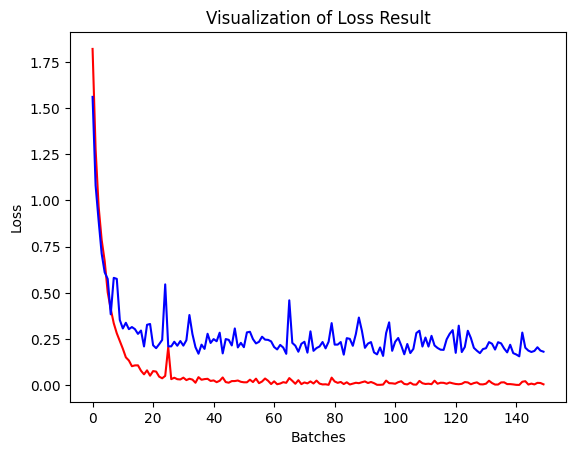

In [ ]:
#Visualization of Loss
epochs = [i for i in range(1, 31)]
plt.plot(range(len(training_history.history['loss'])), training_history.history['loss'],color = "red", label = 'Training Loss')
plt.plot(range(len(training_history.history['val_loss'])), training_history.history['val_loss'],color = "blue", label = 'Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title("Visualization of Loss Result")
plt.show()

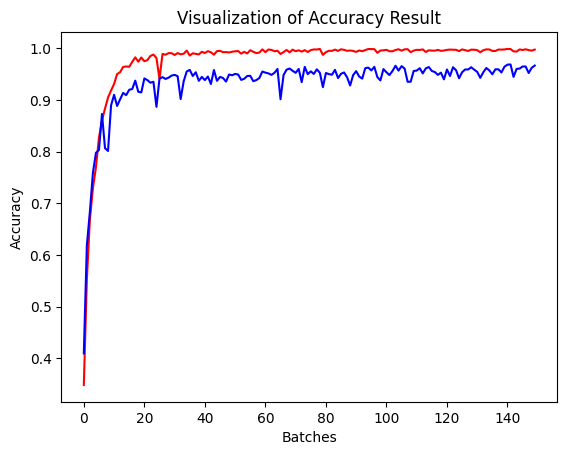

In [ ]:
#Accuracy Visualization
plt.plot(range(len(training_history.history['accuracy'])), training_history.history['accuracy'],color = "red", label = 'Training Accuracy')
plt.plot(range(len(training_history.history['val_accuracy'])), training_history.history['val_accuracy'],color = "blue", label = 'Validation Accuracy')
plt.xlabel('Batches')
plt.ylabel('Accuracy')
plt.title("Visualization of Accuracy Result")
plt.show()

# Precision, Recall, Confusion Metrics Calculation

In [ ]:
y_pred = model.predict(X_test)
y_pred

87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step


array([[6.2365483e-27, 2.5843238e-28, 1.0895079e-33, ..., 3.7383285e-21,
        4.0003418e-14, 7.9860946e-22],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.5194344e-41, 0.0000000e+00],
       [3.0904942e-21, 7.7885900e-19, 8.5976705e-26, ..., 6.9501581e-19,
        1.3256422e-18, 1.7390202e-15],
       ...,
       [1.0000000e+00, 4.1161050e-34, 1.5958604e-26, ..., 7.7205651e-31,
        3.5771191e-25, 1.2300789e-20],
       [1.5251193e-24, 2.8400539e-23, 1.3852068e-34, ..., 4.6389118e-25,
        3.3121473e-24, 8.6142796e-19],
       [1.7000143e-21, 2.4321680e-29, 1.0000000e+00, ..., 3.3499348e-33,
        3.7505033e-26, 1.6080351e-24]], dtype=float32)

In [ ]:
y_pred.shape, y_test.shape

((2777, 10), (2777, 10))

In [ ]:
predicited_categories = np.argmax(y_pred, axis = 1)
predicited_categories

array([3, 7, 3, ..., 0, 3, 2])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
true_categories = np.argmax(y_test, axis = 1)
true_categories

array([3, 7, 3, ..., 0, 3, 2])

In [ ]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_categories, predicited_categories)

#Precision Recall F1Score
print(classification_report(true_categories, predicited_categories, target_names = classes))

              precision    recall  f1-score   support

       blues       0.98      0.94      0.96       314
   classical       0.99      0.98      0.99       292
     country       0.95      0.96      0.95       320
       disco       0.97      0.99      0.98       294
      hiphop       1.00      0.96      0.98        73
        jazz       0.96      0.99      0.98       288
       metal       0.98      0.95      0.97       307
         pop       0.98      0.96      0.97       300
      reggae       0.97      0.96      0.97       285
        rock       0.92      0.96      0.94       304

    accuracy                           0.97      2777
   macro avg       0.97      0.97      0.97      2777
weighted avg       0.97      0.97      0.97      2777



# Confusion Matrix Visualization

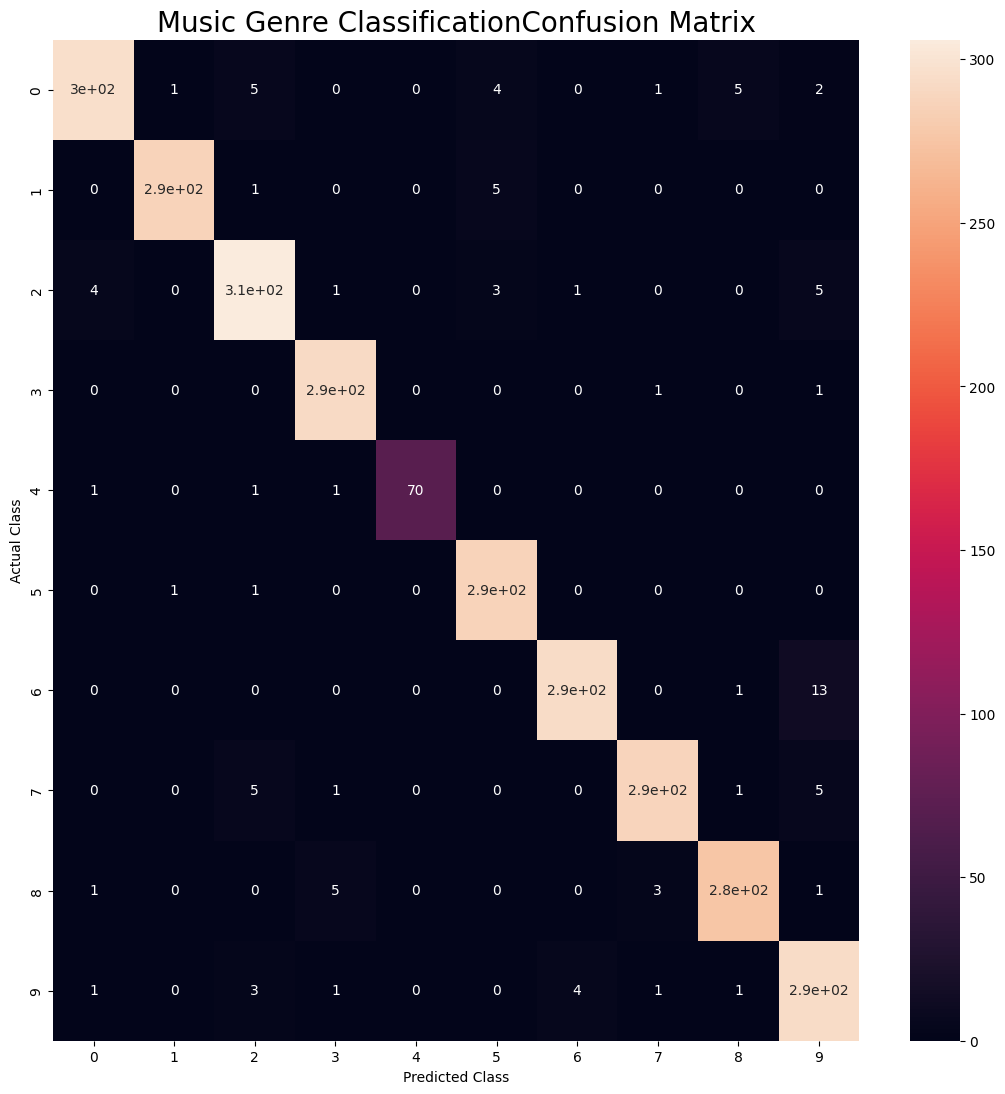

In [ ]:
plt.figure(figsize = (13,13))
sns.heatmap(cm, annot = True, annot_kws = {"size": 10})
plt.title("Music Genre ClassificationConfusion Matrix", fontsize = 20)
plt.xlabel("Predicted Class", fontsize = 10)
plt.ylabel("Actual Class", fontsize = 10)
plt.show()

### **Long Short-Term Memory(LSTM) Model Implementation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Calculate the number of features needed
num_features = X_train.size // (X_train.shape[0] * 1)

# Reshape with the calculated number of features
X_train_lstm = X_train.reshape(X_train.shape[0], 1, num_features)

In [ ]:
# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()

    # LSTM layer
    model.add(LSTM(128, input_shape=input_shape, return_sequences=False, activation='relu'))
    model.add(Dropout(0.5))  # Prevent overfitting

    # Fully connected (dense) layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Another dropout layer to prevent overfitting

    # Output layer (10 classes for genres)
    model.add(Dense(10, activation='softmax'))

    return model

In [ ]:
# Build and compile the model
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
lstm_model = build_lstm_model(input_shape)
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Print model summary
lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          95,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,650 (408.79 KB)

 Trainable params: 104,650 (408.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = lstm_model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), batch_size=32, epochs=250, verbose=2)

Epoch 1/250
219/219 - 4s - 17ms/step - accuracy: 0.3591 - loss: 1.7956 - val_accuracy: 0.5566 - val_loss: 1.2758
Epoch 2/250
219/219 - 3s - 12ms/step - accuracy: 0.5097 - loss: 1.3642 - val_accuracy: 0.6426 - val_loss: 1.0571
Epoch 3/250
219/219 - 2s - 8ms/step - accuracy: 0.5686 - loss: 1.2196 - val_accuracy: 0.6890 - val_loss: 0.9412
Epoch 4/250
219/219 - 1s - 5ms/step - accuracy: 0.6166 - loss: 1.0892 - val_accuracy: 0.7177 - val_loss: 0.8598
Epoch 5/250
219/219 - 1s - 6ms/step - accuracy: 0.6411 - loss: 1.0405 - val_accuracy: 0.7347 - val_loss: 0.8160
Epoch 6/250
219/219 - 1s - 6ms/step - accuracy: 0.6665 - loss: 0.9843 - val_accuracy: 0.7464 - val_loss: 0.7689
Epoch 7/250
219/219 - 1s - 6ms/step - accuracy: 0.6730 - loss: 0.9435 - val_accuracy: 0.7501 - val_loss: 0.7342
Epoch 8/250
219/219 - 1s - 6ms/step - accuracy: 0.6986 - loss: 0.8841 - val_accuracy: 0.7704 - val_loss: 0.6984
Epoch 9/250
219/219 - 1s - 5ms/step - accuracy: 0.6983 - loss: 0.8538 - val_accuracy: 0.7728 - val_los

In [ ]:
# Evaluate the model
train_loss, train_acc = lstm_model.evaluate(X_train_lstm, y_train, verbose=2)
test_loss, test_acc = lstm_model.evaluate(X_test_lstm, y_test, verbose=2)

219/219 - 0s - 2ms/step - accuracy: 0.9964 - loss: 0.0167
94/94 - 0s - 2ms/step - accuracy: 0.8976 - loss: 0.6395


In [ ]:
print(f"\nTrain Accuracy: {train_acc * 100:.4f}% \nTrain Loss: {train_loss:.4f}")
print(f"\nTest Accuracy: {test_acc * 100:.4f}% \nTest Loss: {test_loss:.4f}")


Train Accuracy: 99.6425% 
Train Loss: 0.0167

Test Accuracy: 89.7564% 
Test Loss: 0.6395


### **Support Vector Machine(SVM) Model Implementation**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train_svm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_svm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Define the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

In [ ]:
# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Predict on training and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"\nSVM Model Performance")
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


SVM Model Performance
Train Accuracy: 91.29%
Test Accuracy: 85.29%


In [ ]:
# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report on Test Set:
              precision    recall  f1-score   support

       blues       0.87      0.87      0.87       319
   classical       0.85      0.98      0.91       308
     country       0.79      0.79      0.79       286
       disco       0.81      0.80      0.80       301
      hiphop       0.93      0.84      0.88       311
        jazz       0.84      0.85      0.85       286
       metal       0.89      0.92      0.91       303
         pop       0.87      0.90      0.88       267
      reggae       0.88      0.87      0.88       316
        rock       0.78      0.69      0.73       300

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



# **k-Nearest Neighbour Algorithm(kNN) Model Implementation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the kNN model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)


In [ ]:
# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predict on training and test sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"\nkNN Model (k={k}) Performance")
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


kNN Model (k=5) Performance
Train Accuracy: 93.35%
Test Accuracy: 88.52%


In [ ]:
# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report on Test Set:
              precision    recall  f1-score   support

       blues       0.92      0.87      0.89       319
   classical       0.87      0.95      0.91       308
     country       0.80      0.85      0.82       286
       disco       0.82      0.90      0.86       301
      hiphop       0.93      0.90      0.91       311
        jazz       0.90      0.84      0.86       286
       metal       0.98      0.94      0.96       303
         pop       0.91      0.90      0.90       267
      reggae       0.85      0.91      0.87       316
        rock       0.92      0.79      0.85       300

    accuracy                           0.89      2997
   macro avg       0.89      0.88      0.88      2997
weighted avg       0.89      0.89      0.89      2997



# **Hyperparameter Tuning for SVM**
To improve the performance of SVM and kNN models, we can also perform hyperparameter tuning using techniques like Grid Search or Randomized Search.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [ ]:
# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)

In [ ]:
# Fit the grid to the data
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   3.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   2.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   2.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   1.1s
[CV] END ...................C=0.1, gamma=auto, k

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [ ]:
# Best parameters
print(f"Best parameters found: {grid.best_params_}")

Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Evaluate the best model
best_svm_model = grid.best_estimator_
y_test_pred = best_svm_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"\nOptimized SVM Test Accuracy: {test_acc * 100:.2f}%")


Optimized SVM Test Accuracy: 91.39%




1) The CNN model remains the top performer for this task.

2) SVM and kNN models can be good baselines but may not achieve the same level of accuracy as CNNs in handling complex data.


3)  Hyperparameter tuning can help improve the performance of traditional machine learning models.
4)  For further improvements, consider the following:

*   Feature Selection: Analyze feature importance to reduce dimensionality.
*   Ensemble Methods: Combine multiple models to improve generalization.


*   Data Augmentation: Increase the diversity of your dataset if possible.
*   Adjusting the CNN Architecture: Experiment with deeper networks, different activation functions, or regularization techniques.














